# Author: Surabhi Narendra Revandkar

# Data Science and Business Analytics Intern at The Sparks Foundation

## Task : Prediction using Decision Tree Algorithm on Iris Dataset

In [28]:
import numpy as np
import pandas as pd

#### Import the Iris dataset

In [42]:
df = pd.read_csv('Iris.csv')

In [43]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [31]:
df.shape

(150, 6)

#### Check the null values

In [32]:
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

#### Check the unique values of variable Species along with it's count

In [33]:
df['Species'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

#### Split dependent and independent variables

In [34]:
X = df.drop(['Species','Id'], axis = 1)
y = df.Species

In [35]:
X.head(70)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
65,6.7,3.1,4.4,1.4
66,5.6,3.0,4.5,1.5
67,5.8,2.7,4.1,1.0
68,6.2,2.2,4.5,1.5


In [36]:
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

#### Import library to split our data into train and test

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [17]:
X_train.shape

(135, 4)

In [18]:
y_test.shape

(15,)

#### import the model - Decision Tree 

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

#### Implement the model on training data

In [20]:
model=DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

#### Predicting and checking accuracy of model on test data

In [37]:
prediction=model.predict(X_test)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction,y_test))

The accuracy of the Decision Tree is 1.0


### It can be seen that the accuracy of model came out to be 100%

In [22]:
from sklearn import tree

In [23]:
X_test.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
114,5.8,2.8,5.1,2.4
62,6.0,2.2,4.0,1.0
33,5.5,4.2,1.4,0.2
107,7.3,2.9,6.3,1.8
7,5.0,3.4,1.5,0.2


In [24]:
y_test.head()

114     Iris-virginica
62     Iris-versicolor
33         Iris-setosa
107     Iris-virginica
7          Iris-setosa
Name: Species, dtype: object

## Creating a function to give user defined inputs for prediction

In [38]:
# Creating a function for prediction
def Species(SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm):
    sepalLengthCm = float(SepalLengthCm)
    sepalWidthCm = float(SepalWidthCm)
    petalLengthCm = float(PetalLengthCm)
    petalWidthCm = float(PetalWidthCm)

    x = [[sepalLengthCm, sepalWidthCm, petalLengthCm, petalWidthCm]]

    return model.predict(x)

In [39]:
# Input sequence: SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm.
prediction = Species(5.6,3.0,4.5,1.5)
if (prediction=='Iris-setosa'):
    print('Iris-setosa')
elif (prediction=='Iris-versicolor'):
    print('Iris-versicolor')
else:
    print('Iris-virginica')

Iris-versicolor


## Visualize Decision Tree 

In [40]:
import matplotlib.pyplot as plt

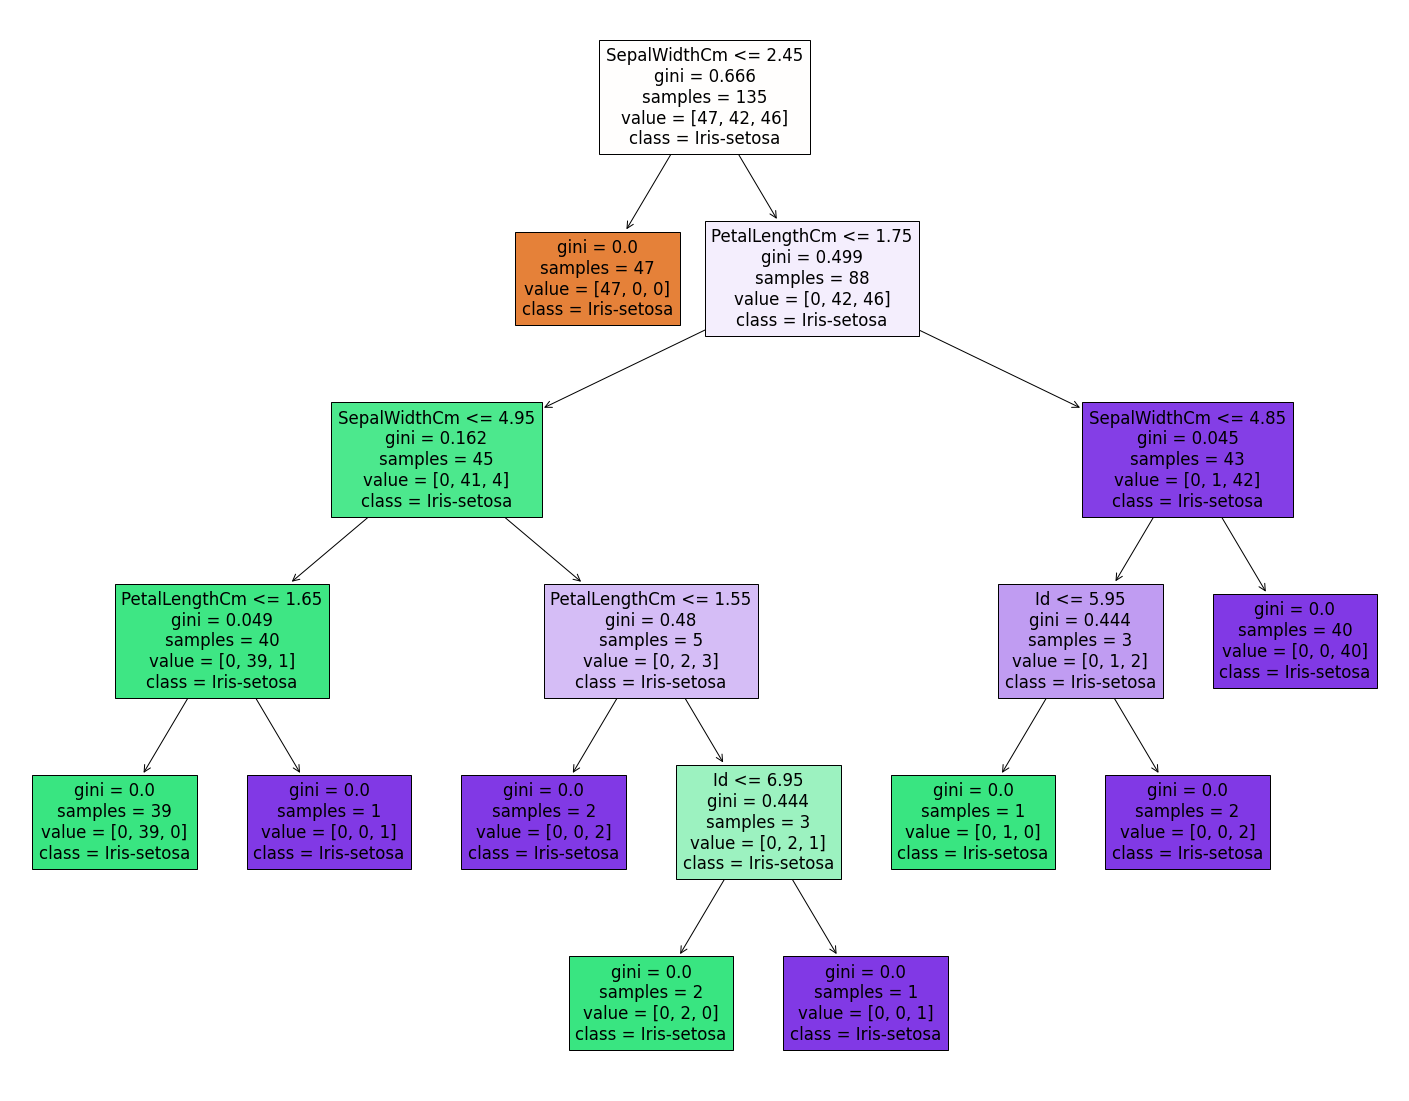

In [41]:
fig = plt.figure(figsize=(25,20))
tree = tree.plot_tree(model, 
                   feature_names=df.columns,  
                   class_names=df.Species,
                   filled=True)